In [154]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Dictionary for genres label encoding:
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
          'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

In [118]:
data=pd.read_csv("./Features/features2.csv")
data.head()

,centroid_mean,centroid_std,chroma_mean,chroma_std,flux_mean,flux_std,genre,mfcc_0_mean,mfcc_0_std,mfcc_10_mean,...,mfcc_8_std,mfcc_9_mean,mfcc_9_std,rmse_mean,rmse_std,roloff_mean,roloff_std,tempo,zcr_mean,zcr_std
0,888.192767,379.074067,0.525691,0.295343,1.557968,1.675129,0,-298.866425,55.572163,-1.312751,...,10.512544,4.846227,12.137277,0.118639,0.061269,1770.389295,1010.104647,172.265625,0.029214,0.015715
1,1001.220509,363.289566,0.497065,0.294911,1.479048,1.466835,0,-239.033478,48.344673,-6.611788,...,8.462409,2.155131,8.355743,0.160613,0.060511,2055.339246,1014.663475,172.265625,0.034871,0.015003
2,846.548114,618.517730,0.576510,0.270677,1.633401,2.636701,0,-317.237152,81.588196,-1.960779,...,10.031506,9.536193,8.848726,0.102250,0.037121,1625.756836,1435.688964,123.046875,0.032692,0.029412
3,973.959994,609.317788,0.564331,0.271416,1.451815,2.326623,0,-300.514404,92.136734,-2.918866,...,10.758454,11.795238,10.521724,0.094613,0.039514,1878.647167,1368.791028,129.199219,0.039325,0.030719
4,1101.462315,365.249696,0.379367,0.298470,1.422705,1.567510,0,-290.625641,67.902252,-7.053016,...,9.873894,-5.429997,10.567539,0.112067,0.066417,2234.553155,871.327336,95.703125,0.050290,0.033235


In [119]:
X=data.drop('genre',axis=1)

In [120]:
y=data.genre

In [121]:
scaled_features = StandardScaler().fit_transform(X.values)
X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)


In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
X_train.shape

(1584, 39)

In [142]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

In [143]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [144]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
1584/1584 [==============================] - 1s 826us/step - loss: 2.0284 - acc: 0.2816
Epoch 2/100
1584/1584 [==============================] - 0s 60us/step - loss: 1.4521 - acc: 0.4981
Epoch 3/100
1584/1584 [==============================] - 0s 58us/step - loss: 1.1133 - acc: 0.6351
Epoch 4/100
1584/1584 [==============================] - 0s 55us/step - loss: 0.9074 - acc: 0.6982
Epoch 5/100
1584/1584 [==============================] - 0s 50us/step - loss: 0.7869 - acc: 0.7399
Epoch 6/100
1584/1584 [==============================] - 0s 65us/step - loss: 0.6831 - acc: 0.7746
Epoch 7/100
1584/1584 [==============================] - 0s 57us/step - loss: 0.6046 - acc: 0.8018
Epoch 8/100
1584/1584 [==============================] - 0s 62us/step - loss: 0.5380 - acc: 0.8220
Epoch 9/100
1584/1584 [==============================] - 0s 51us/step - loss: 0.4984 - acc: 0.8308
Epoch 10/100
1584/1584 [==============================] - 0s 50us/step - loss: 0.4500 - acc: 0.8548
Epoch 11

In [145]:
test_loss, test_acc = model.evaluate(X_test,y_test)

396/396 [==============================] - 0s 911us/step


In [146]:
print(test_loss, test_acc)

0.8226313362217913 0.840909091511158


In [147]:
y_pred=model.predict(X_test)

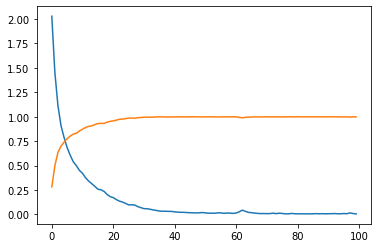

In [148]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])

In [149]:
from sklearn.metrics import classification_report, confusion_matrix

In [151]:
Y_pred = np.argmax(y_pred, axis=1)
confusion_matrix(y_test, Y_pred)

array([[30,  0,  4,  0,  0,  0,  1,  0,  1,  0],
       [ 0, 45,  0,  0,  0,  2,  0,  0,  0,  1],
       [ 0,  1, 39,  1,  0,  1,  0,  0,  1,  4],
       [ 0,  0,  1, 22,  3,  0,  1,  1,  1,  2],
       [ 0,  0,  0,  2, 30,  0,  0,  4,  3,  1],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1, 34,  0,  1,  2],
       [ 0,  0,  1,  0,  0,  0,  0, 38,  3,  1],
       [ 0,  0,  0,  0,  4,  1,  0,  2, 29,  1],
       [ 1,  0,  0,  3,  1,  4,  0,  0,  0, 34]])